# Part I - Ford GoBike Analysis
## by Taiwo Ajagunsegun

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# What is the structure of your dataset?
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Shape of the dataset
df.shape

(183412, 16)

In [5]:
# Basic information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> From the descriptive statistics shown above, the duration_sec column contains some extreme values also known as outliers. Although these values may not be treated as such since the column represents the duration of bike trips in seconds.

### What is the structure of your dataset?

> A total of 183,412 bike trips were recorded in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip').

> The datatypes are majorly floats, objects , and integers. Although, columns such as 'start_time' and 'end_time' should be converted to datetime datatype while 'start_station_id', 'end_station_id', and 'bike_id' should be converted to object datatype. Also, the 'member_birth_year' column can be treated as a numerical column in case I want to check the distribution of the ages of members.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out the distribution of the features and the relationships that exist between them.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the 'duration_sec' column representing the duration of the trip, and the user_type column would have the most effect on the dependent variable 'bike_share_for_all_trip'.

In [7]:
# Drop all observations with missing values
df.dropna(inplace = True)

In [8]:
# Perform all necessary transformations
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

##### Create a new column named "Age" from the "member_birth_year" column

In [9]:
from datetime import datetime
df['Age'] = datetime.today().year - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

## Univariate Exploration

> I would start by displaying the distribution of the duration_sec column.

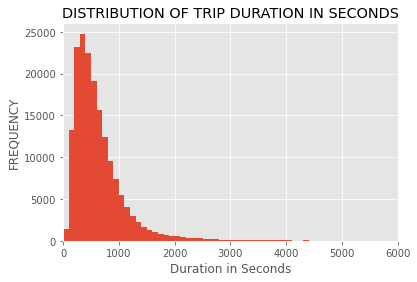

In [11]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlim(0, 6000);
plt.title('DISTRIBUTION OF TRIP DURATION IN SECONDS')
plt.xlabel('Duration in Seconds')
plt.ylabel('FREQUENCY');

> From the above plot, it can be observed that the duration_sec column is heavily skewed to the right meaning that most of the trips are short trips.

Let's find out about the distribution of the ages of members.

Mean: 37.196865425945404, Median: 35.0, Mode: 0    34.0
dtype: float64


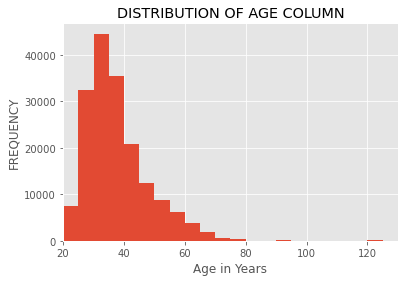

In [12]:
binsize = 5
bins = np.arange(0, df['Age'].max()+binsize, binsize)
print('Mean: {}, Median: {}, Mode: {}'.format(df.Age.mean(), df.Age.median(), df.Age.mode()))
plt.hist(data = df, x = 'Age', bins = bins);
plt.xlim(20, 130);
plt.title('DISTRIBUTION OF AGE COLUMN')
plt.xlabel('Age in Years')
plt.ylabel('FREQUENCY');

> From the above plot, majority of the members are in their mid 30's with the mean age of 37.2 years, median age of 35 years, and modal age of 34 years.

In [13]:
# Drop all the observations with Age greater than 80 years old.
df = df[df['Age'] <= 80]

Let's find out the distribution of the gender of members.

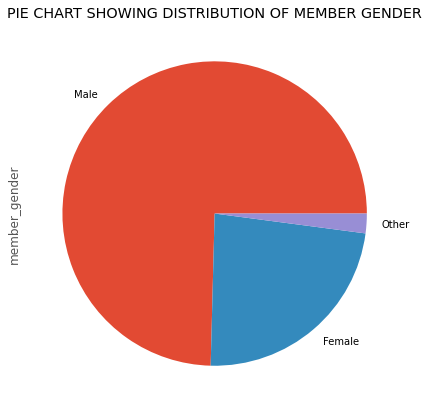

In [14]:
plt.figure(figsize = (7,7))
df['member_gender'].value_counts().plot(kind = 'pie');
plt.title('PIE CHART SHOWING DISTRIBUTION OF MEMBER GENDER');

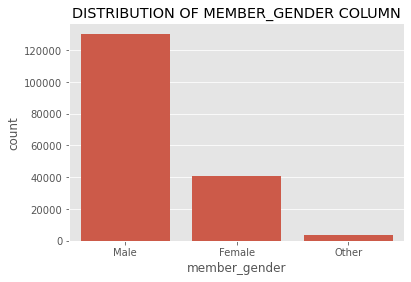

In [15]:
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'member_gender',  order = ['Male', 'Female', 'Other'], color = default_color );
plt.title('DISTRIBUTION OF MEMBER_GENDER COLUMN');

> From the above plot, it shows that there are more male members than female members. Also few members are categorized as Other.

Let's find out the distribution of the user_type column.

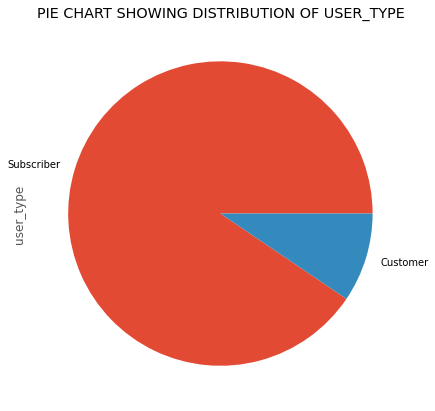

In [16]:
plt.figure(figsize = (7,7))
df['user_type'].value_counts().plot(kind = 'pie');
plt.title('PIE CHART SHOWING DISTRIBUTION OF USER_TYPE');

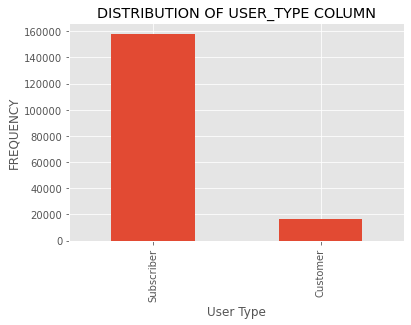

In [17]:
df['user_type'].value_counts().plot(kind = 'bar');
plt.title('DISTRIBUTION OF USER_TYPE COLUMN')
plt.xlabel('User Type')
plt.ylabel('FREQUENCY');

> From the above plot, it is seen that there are 2 categories of user type namely 'Subscriber' and 'Customer'. Although, there are more Subscribers in the dataset than Customers.

Let's find out the distribution of the bike_share_for_all_trip column.

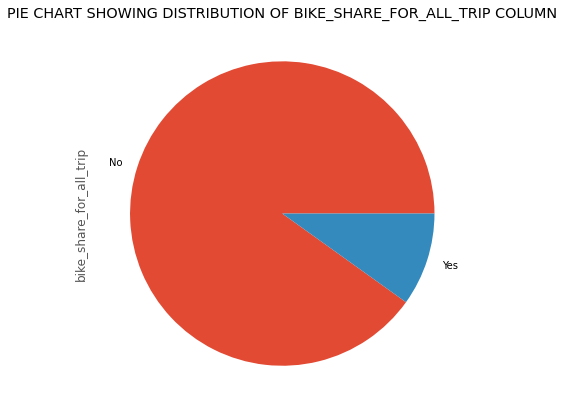

In [18]:
plt.figure(figsize = (7,7))
df['bike_share_for_all_trip'].value_counts().plot(kind = 'pie');
plt.title('PIE CHART SHOWING DISTRIBUTION OF BIKE_SHARE_FOR_ALL_TRIP COLUMN');

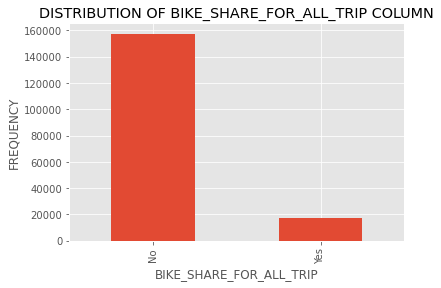

In [19]:
df['bike_share_for_all_trip'].value_counts().plot(kind = 'bar');
plt.title('DISTRIBUTION OF BIKE_SHARE_FOR_ALL_TRIP COLUMN')
plt.xlabel('BIKE_SHARE_FOR_ALL_TRIP')
plt.ylabel('FREQUENCY');

> From the plot, It can be inferred that few of the users shared a bike for their trips. Further analysis is needed to discover what could be responsible for that.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the duration_sec column indicates a heavily right skewed distribution which suggests that most of the trips are short trips. Also, most of the members are male which doesn't seem unusual.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the age column tells that most of the members are young. Nonetheless, the plot shows that some of the members ages fall between 80 and 130 years which might be considered as outliers. These outliers were later dropped from the dataset.

## Bivariate Exploration

Let's find out the distribution of the member gender column by the bike_share_for_all_trip

In [20]:
df.groupby(['member_gender', 'bike_share_for_all_trip'])['bike_share_for_all_trip'].count()

member_gender  bike_share_for_all_trip
Female         No                          37197
               Yes                          3568
Male           No                         117255
               Yes                         13076
Other          No                           2996
               Yes                           648
Name: bike_share_for_all_trip, dtype: int64

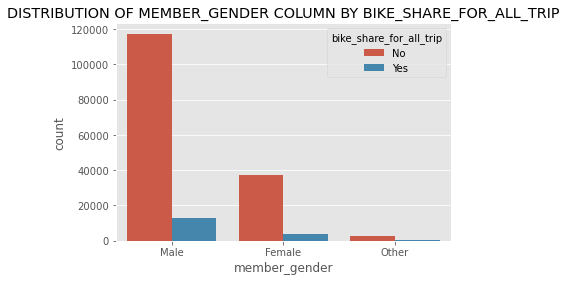

In [21]:
sns.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip', order = ['Male', 'Female', 'Other']);
plt.title('DISTRIBUTION OF MEMBER_GENDER COLUMN BY BIKE_SHARE_FOR_ALL_TRIP');

> From the above plot, we can see that the percentage of members that shared bike for all the trips are fairly distributed among the genders.

Comparing the distribution of the user_type column by the bike_share_for_all_trip column

In [22]:
df.groupby(['user_type', 'bike_share_for_all_trip'])['bike_share_for_all_trip'].count()

user_type   bike_share_for_all_trip
Customer    No                          16553
Subscriber  No                         140895
            Yes                         17292
Name: bike_share_for_all_trip, dtype: int64

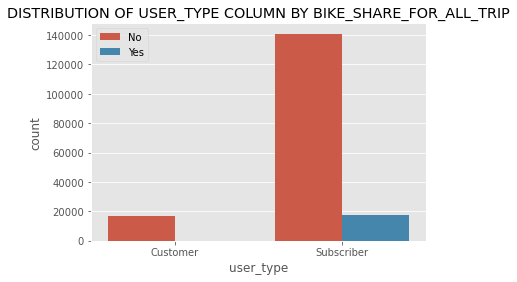

In [23]:
sns.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip');
plt.title('DISTRIBUTION OF USER_TYPE COLUMN BY BIKE_SHARE_FOR_ALL_TRIP');
plt.legend(loc = 2);

> The above plot shows that the all the members that shared bike for all their trips are basically subscribers. None of the customers shared a bike for all their trips.

Let's explore the relationship between the duration_sec column and the bike_share_for_all_trip column.

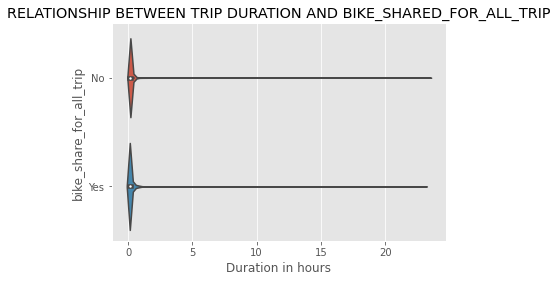

In [24]:
duration_hr = df['duration_sec']/3600
sns.violinplot(data = df, x = duration_hr, y = 'bike_share_for_all_trip');
plt.title('RELATIONSHIP BETWEEN TRIP DURATION AND BIKE_SHARED_FOR_ALL_TRIP')
plt.xlabel('Duration in hours');

> From the plot, it can be observed that most of the trips lasted for few minutes while some of the trips spanned over 20 hours.

Let's explore the relationship between the duration_sec column and the age column.

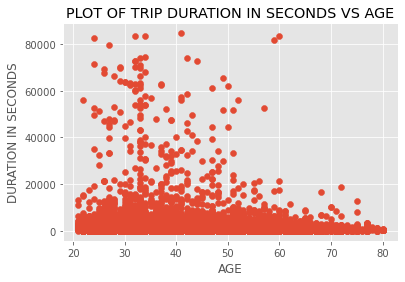

In [25]:
plt.scatter(data = df, y = 'duration_sec', x = 'Age');
plt.title('PLOT OF TRIP DURATION IN SECONDS VS AGE')
plt.xlabel('AGE')
plt.ylabel('DURATION IN SECONDS');

> It is worthy to note that younger people spend more time in their trips compared to older people. From the above plot, members between the ages of 20 years and 50 years spent the higher percentage of time in their trips.

Exploring the start_station and end_station location information.

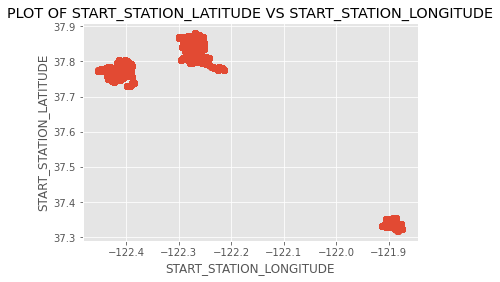

In [26]:
plt.scatter(data = df, x = 'start_station_longitude', y = 'start_station_latitude');
plt.title('PLOT OF START_STATION_LATITUDE VS START_STATION_LONGITUDE')
plt.xlabel('START_STATION_LONGITUDE')
plt.ylabel('START_STATION_LATITUDE');

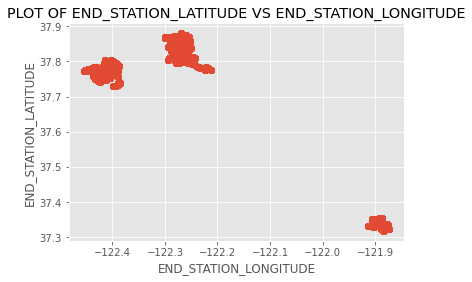

In [27]:
plt.scatter(data = df, x = 'end_station_longitude', y = 'end_station_latitude');
plt.title('PLOT OF END_STATION_LATITUDE VS END_STATION_LONGITUDE')
plt.xlabel('END_STATION_LONGITUDE')
plt.ylabel('END_STATION_LATITUDE');

> From the above plots, it can be observed that most of the stations act as both start_stations and end_stations as both plots represent the same shape on the map.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From my exploration, I observed that the percentage of members that shared bike for all the trips are fairly distributed among the genders. Also, I observed that most of the trips lasted for few minutes while some of the trips spanned over 20 hours.

> Members between the ages of 20 years and 50 years spent the higher percentage of time in their trips. Also, most of the stations act as both start_stations and end_stations as both latitude vs longitude plots represent the same shape on the map.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of the interesting findings I discovered is that all the members that shared bike for all their trips are basically subscribers. None of the customers shared a bike for all their trips.

## Multivariate Exploration

Let's explore the relationship between the duration_sec column and the age column factoring in the bike_share_for_all_trip column as hue argument.

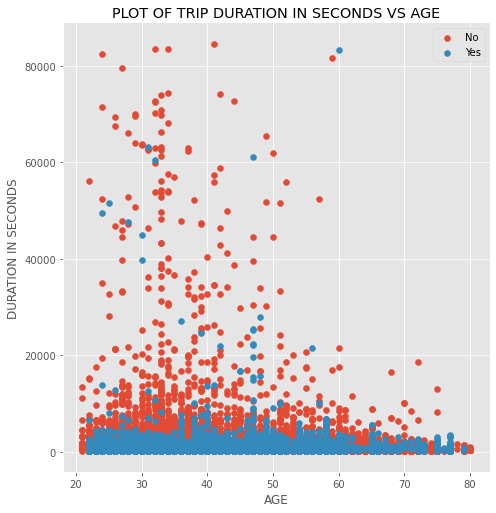

In [28]:
g = sns.FacetGrid(data = df, hue = 'bike_share_for_all_trip', size = 7)
g.map(plt.scatter, 'Age', 'duration_sec' )
plt.title('PLOT OF TRIP DURATION IN SECONDS VS AGE')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('DURATION IN SECONDS');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It can be seen from the multivariate plot that the members that shared all their trips are distributed all over the dataset with respect to their ages. Also, those who share bike for all their trips mostly have short trips.

### Were there any interesting or surprising interactions between features?

> Majority of the insights uncovered in this analysis are as expected since they are intuitive.

## Conclusions
> I explored the distribution of some features and the relationships inherent between some of the features in the dataset. I observed that the duration_sec column has a heavily right skewed distribution which suggests that most of the trips are short trips. Also, most of the members are male which doesn't seem unusual.

> I also found out that members between the ages of 20 years and 50 years spent higher percentage of time in their trips. Also, most of the stations act as both start_stations and end_stations as both latitude vs longitude plots represent the same shape on the map.

> One of the interesting findings I discovered is that all the members that shared bike for all their trips are basically subscribers. None of the customers shared a bike for all their trips.